In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')


## Phrase duration vs length

In [6]:
meta = pd.read_csv(f'../data/contours/contours-200-metadata.csv', index_col=0)

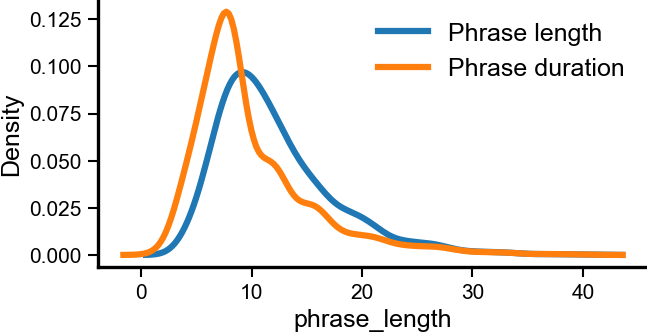

In [12]:
plt.figure(figsize=cm2inch(6, 3))
sns.kdeplot(meta['phrase_length'], label='Phrase length')
sns.kdeplot(meta['phrase_duration'], label='Phrase duration')
plt.legend()

## Phrase duration

In [14]:
def show_length(subset_size, metric, representation, max_len=30, col='phrase_duration'):
    meta = pd.read_csv(f'../data/contours/contours-{subset_size}-metadata.csv', index_col=0)
    X = np.loadtxt(f'../data/mds/metric-mds-{metric}-{subset_size}-{representation}.txt.gz')
    
    x, y = X[meta[col] < max_len+1].T
    plt.scatter(x, y, c=meta[meta[col] < max_len+1][col], 
                alpha=.7, lw=0, s=3, cmap='viridis_r') 

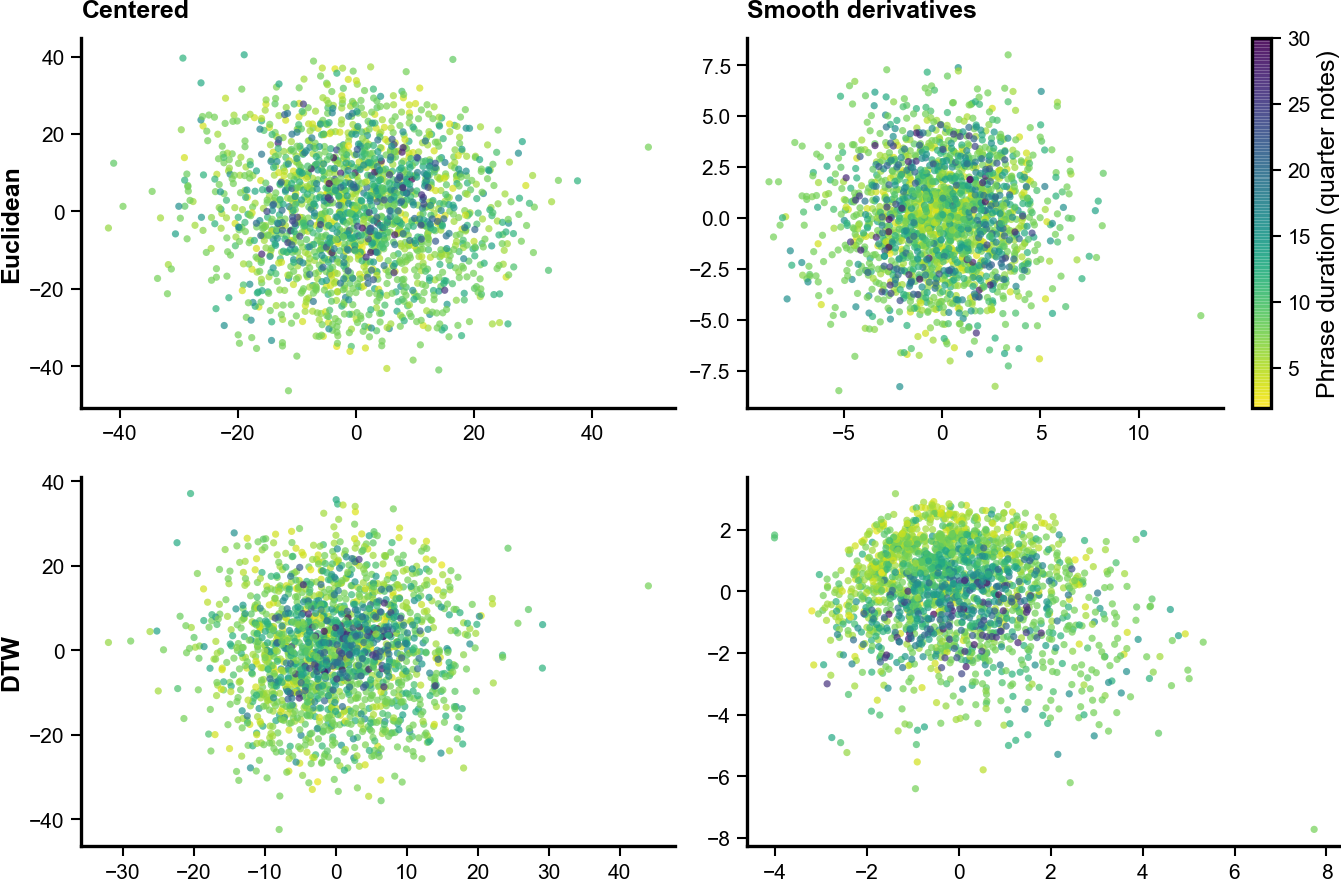

In [15]:
plt.figure(figsize=cm2inch(12, 8))
col = 'phrase_duration'
plt.subplot(221)
title('Centered')
show_length(200, 'eucl', 'centered', col=col)
plt.ylabel('Euclidean', fontweight='bold')

plt.subplot(222)
title('Smooth derivatives')
show_length(200, 'eucl', 'smooth_derivatives', col=col)
clb = plt.colorbar()
clb.ax.set_ylabel('Phrase duration (quarter notes)')

plt.subplot(223)
show_length(200, 'dtw', 'centered', col=col)
plt.ylabel('DTW', fontweight='bold')
    
plt.subplot(224)
show_length(200, 'dtw', 'smooth_derivatives', col=col)

plt.tight_layout()
plt.savefig('../fig-effect-phrase-duration.pdf')

## Phrase length 

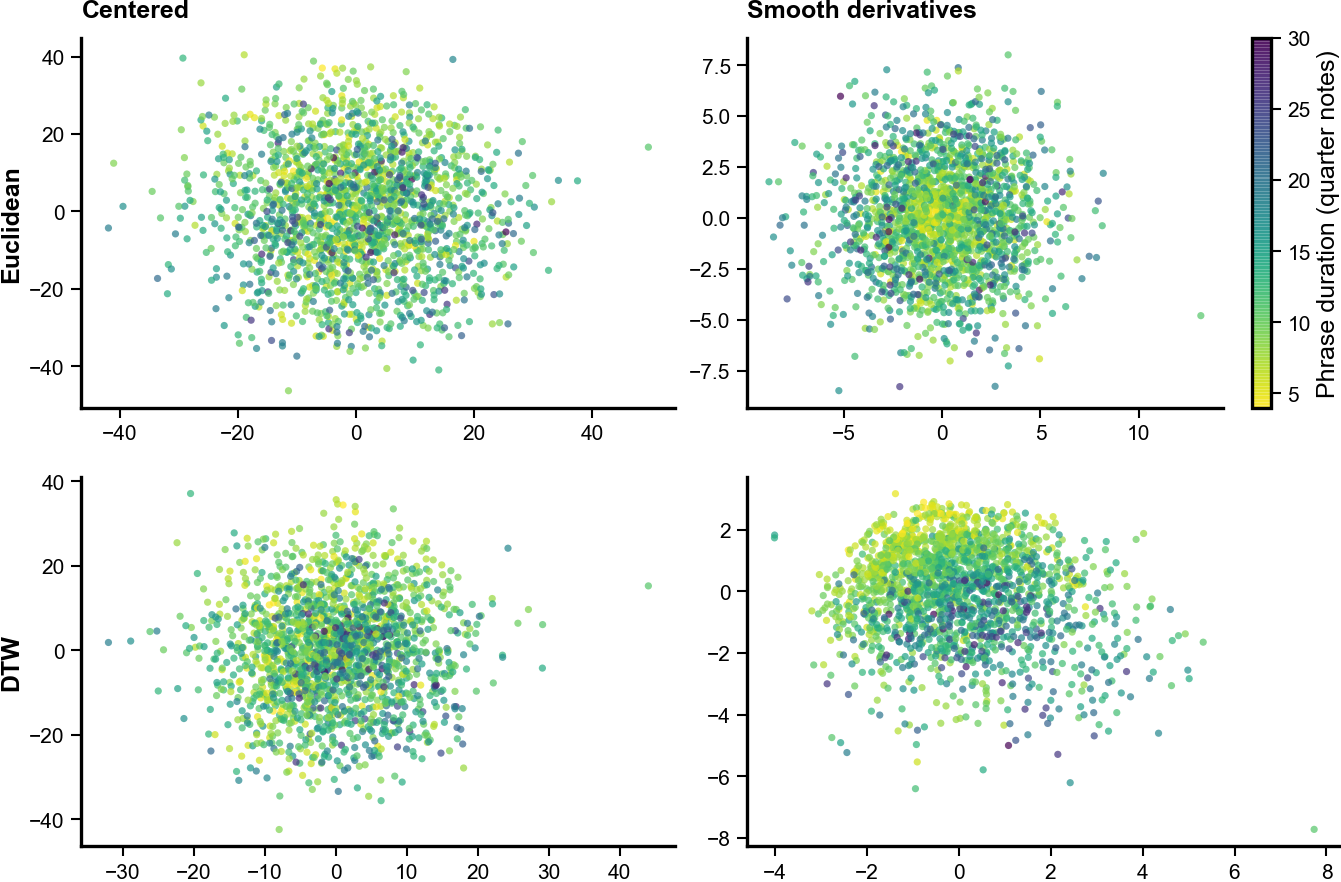

In [16]:
plt.figure(figsize=cm2inch(12, 8))
col = 'phrase_length'
plt.subplot(221)
title('Centered')
show_length(200, 'eucl', 'centered', col=col)
plt.ylabel('Euclidean', fontweight='bold')

plt.subplot(222)
title('Smooth derivatives')
show_length(200, 'eucl', 'smooth_derivatives', col=col)
clb = plt.colorbar()
clb.ax.set_ylabel('Phrase duration (quarter notes)')

plt.subplot(223)
show_length(200, 'dtw', 'centered', col=col)
plt.ylabel('DTW', fontweight='bold')
    
plt.subplot(224)
show_length(200, 'dtw', 'smooth_derivatives', col=col)

plt.tight_layout()
plt.savefig('../fig-effect-phrase-length.pdf')